# Hierarchical Bayesian model of binary choice

Imagine a world where everyone chooses whether or not to open their windows. This choice is random, but the probability has some regional influence.

In [25]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
from scipy import stats
import numpy as np
import pymc3 as pm
import seaborn as sns

sns.set_style('darkgrid')

np.random.seed(434)

## Data
I make synthetic data:

In [2]:
# SECRET constants are the true population distribution that we can never know
SECRET_A = 2
SECRET_B = 5
SECRET_P_DIST = stats.beta(SECRET_A, SECRET_B)

In [3]:
REGIONS = ["North", "South", "East", "West"]

In [4]:
SECRET_P = SECRET_P_DIST.rvs(len(REGIONS))
SECRET_P

array([0.14360561, 0.07236543, 0.25310767, 0.32047349])

In [5]:
N_OBS = [150, 100, 50, 10]

In [6]:
observed_counts = [stats.binom.rvs(n, p) for n, p in zip(N_OBS, SECRET_P)]
observed_counts

[14, 6, 12, 3]

Sanity check that simulated observations make sense:

In [7]:
np.array(observed_counts)/np.array(N_OBS)

array([0.09333333, 0.06      , 0.24      , 0.3       ])

In [27]:
observed_p = np.array(observed_counts)/np.array(N_OBS)
observed_p

array([0.09333333, 0.06      , 0.24      , 0.3       ])

Outside of this section, we cannot use SECRET variables because they are the true parameters we can never know exactly.

# Model
Based on https://docs.pymc.io/notebooks/GLM-hierarchical-binominal-model.html

In [9]:
with pm.Model() as model:
    # see e.g. https://arxiv.org/abs/1104.4937 for support of half Cauchy priors
    a = pm.HalfCauchy("a", beta=2)
    b = pm.HalfCauchy("b", beta=2)

    theta = pm.Beta('theta', alpha=a, beta=b, shape=len(REGIONS))

    p = pm.Binomial('p', p=theta, observed=observed_counts, n=N_OBS)
    trace = pm.sample(5000, tune=1000, target_accept=0.95)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta, b, a]
Sampling 4 chains: 100%|████████████████████████████████████████████████████| 24000/24000 [00:11<00:00, 2068.89draws/s]
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 21 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


C:\Users\Immanuel\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\Immanuel\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\Immanuel\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\Immanuel\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argu

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000152EC472CC0>,
      dtype=object)

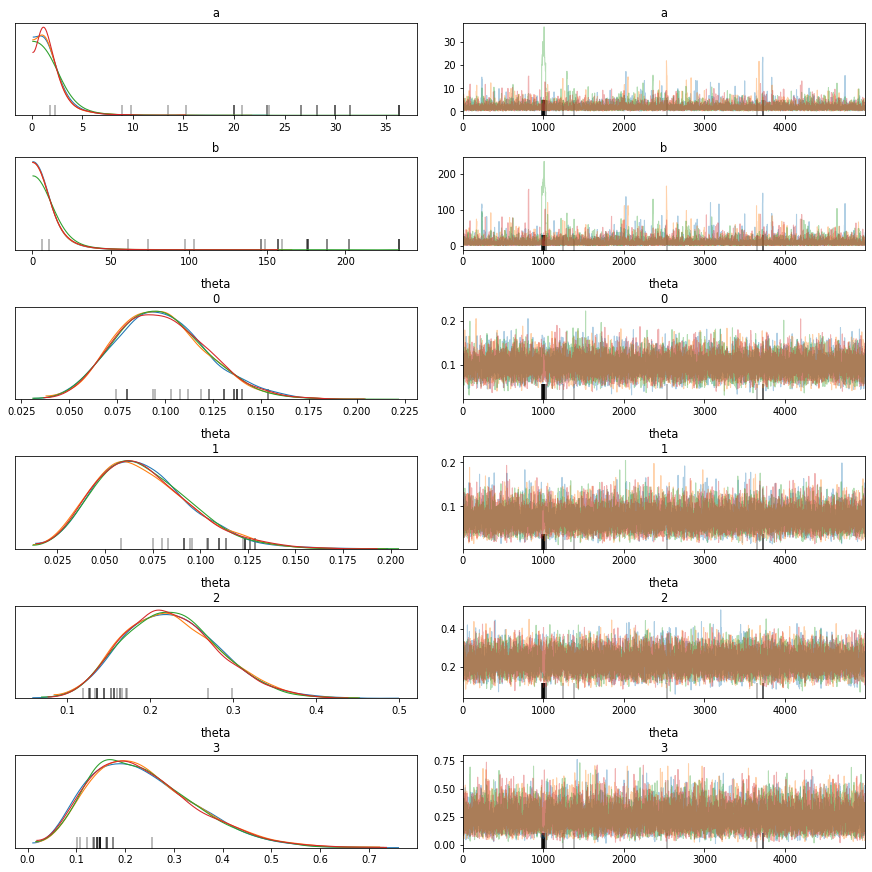

In [10]:
pm.traceplot(trace)

In [11]:
pm.summary(trace)

C:\Users\Immanuel\Anaconda3\lib\site-packages\pymc3\stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
a,2.017820,2.060718,0.047668,0.212766,4.929824,999.041568,1.001565
b,10.741821,14.318769,0.333770,0.307078,29.887140,971.478048,1.001542
theta__0,0.098199,0.023481,0.000165,0.052425,0.142592,18725.911741,1.000070
theta__1,0.070477,0.024894,0.000195,0.026988,0.120988,17718.775204,0.999956
theta__2,0.226303,0.056722,0.000449,0.120116,0.336666,16738.017793,1.000014
theta__3,0.240683,0.108189,0.000775,0.062986,0.459327,16182.485418,1.000183


In [8]:
with pm.Model() as model:
    # see e.g. https://arxiv.org/abs/1104.4937 for support of half Cauchy priors
    a = pm.HalfCauchy("a", beta=1)
    b = pm.HalfCauchy("b", beta=1)

    theta = pm.Beta('theta', alpha=a, beta=b, shape=len(REGIONS))

    p = pm.Binomial('p', p=theta, observed=observed_counts, n=N_OBS)
    trace = pm.sample(5000, tune=1000, target_accept=0.95)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta, b, a]
Sampling 4 chains: 100%|████████████████████████████████████████████████████| 24000/24000 [00:10<00:00, 2260.62draws/s]
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
There were 11 divergences after tuning. Increase `target_accept` or reparameterize.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


In [10]:
with pm.Model() as model:
    # see e.g. https://arxiv.org/abs/1104.4937 for support of half Cauchy priors
    a = pm.HalfCauchy("a", beta=1)
    b = pm.HalfCauchy("b", beta=1)

    theta = pm.Beta('theta', alpha=a, beta=b, shape=len(REGIONS))

    p = pm.Binomial('p', p=theta, observed=observed_counts, n=N_OBS)
    trace = pm.sample(5000, tune=1000, target_accept=0.99)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta, b, a]
Sampling 4 chains: 100%|████████████████████████████████████████████████████| 24000/24000 [00:17<00:00, 1371.84draws/s]


C:\Users\Immanuel\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\Immanuel\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\Immanuel\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\Immanuel\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argu

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002593DFFEE10>,
      dtype=object)

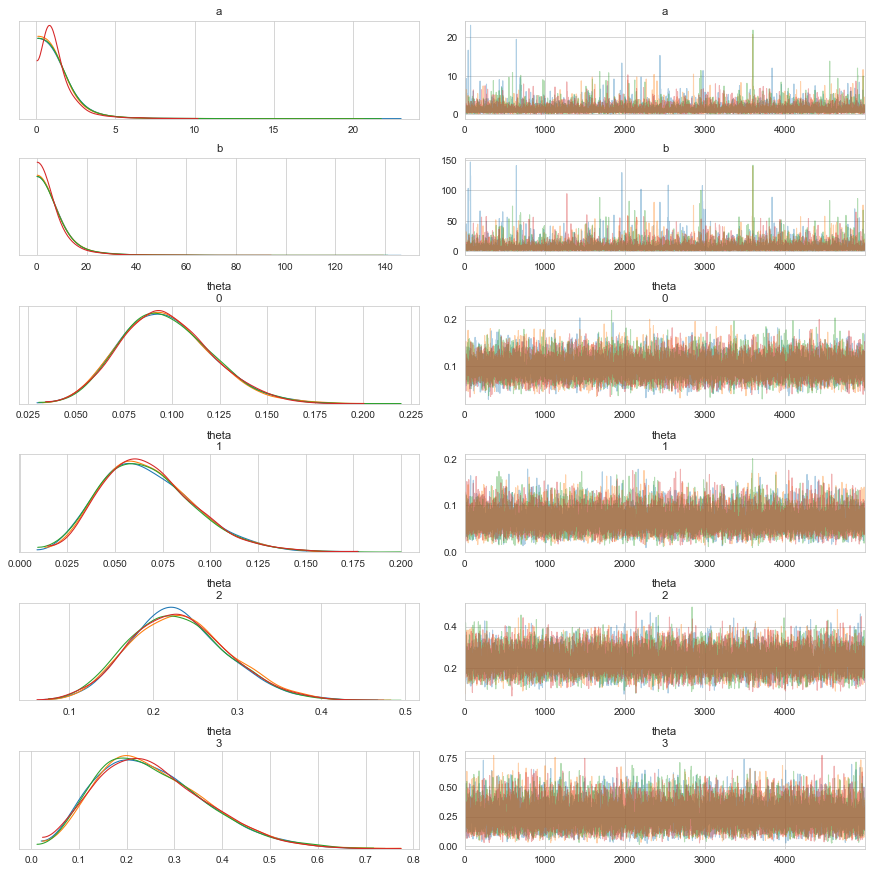

In [11]:
pm.traceplot(trace)

In [12]:
pm.summary(trace)

C:\Users\Immanuel\Anaconda3\lib\site-packages\pymc3\stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
a,1.398674,1.194878,0.014448,0.154818,3.510855,7179.625509,1.000233
b,6.922136,8.202423,0.098807,0.164250,20.780469,7123.775348,1.000180
theta__0,0.097343,0.023558,0.000180,0.052477,0.143243,17807.134629,0.999959
theta__1,0.067914,0.024446,0.000190,0.024841,0.117327,15485.375525,1.000081
theta__2,0.231748,0.057593,0.000534,0.123425,0.346499,13927.577665,1.000389
theta__3,0.257149,0.114179,0.000927,0.059841,0.480408,14636.814480,1.000043


The effect of the divergences and of changing priors on $\theta$ was mild.

# Posterior check

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000259449044A8>,
      dtype=object)

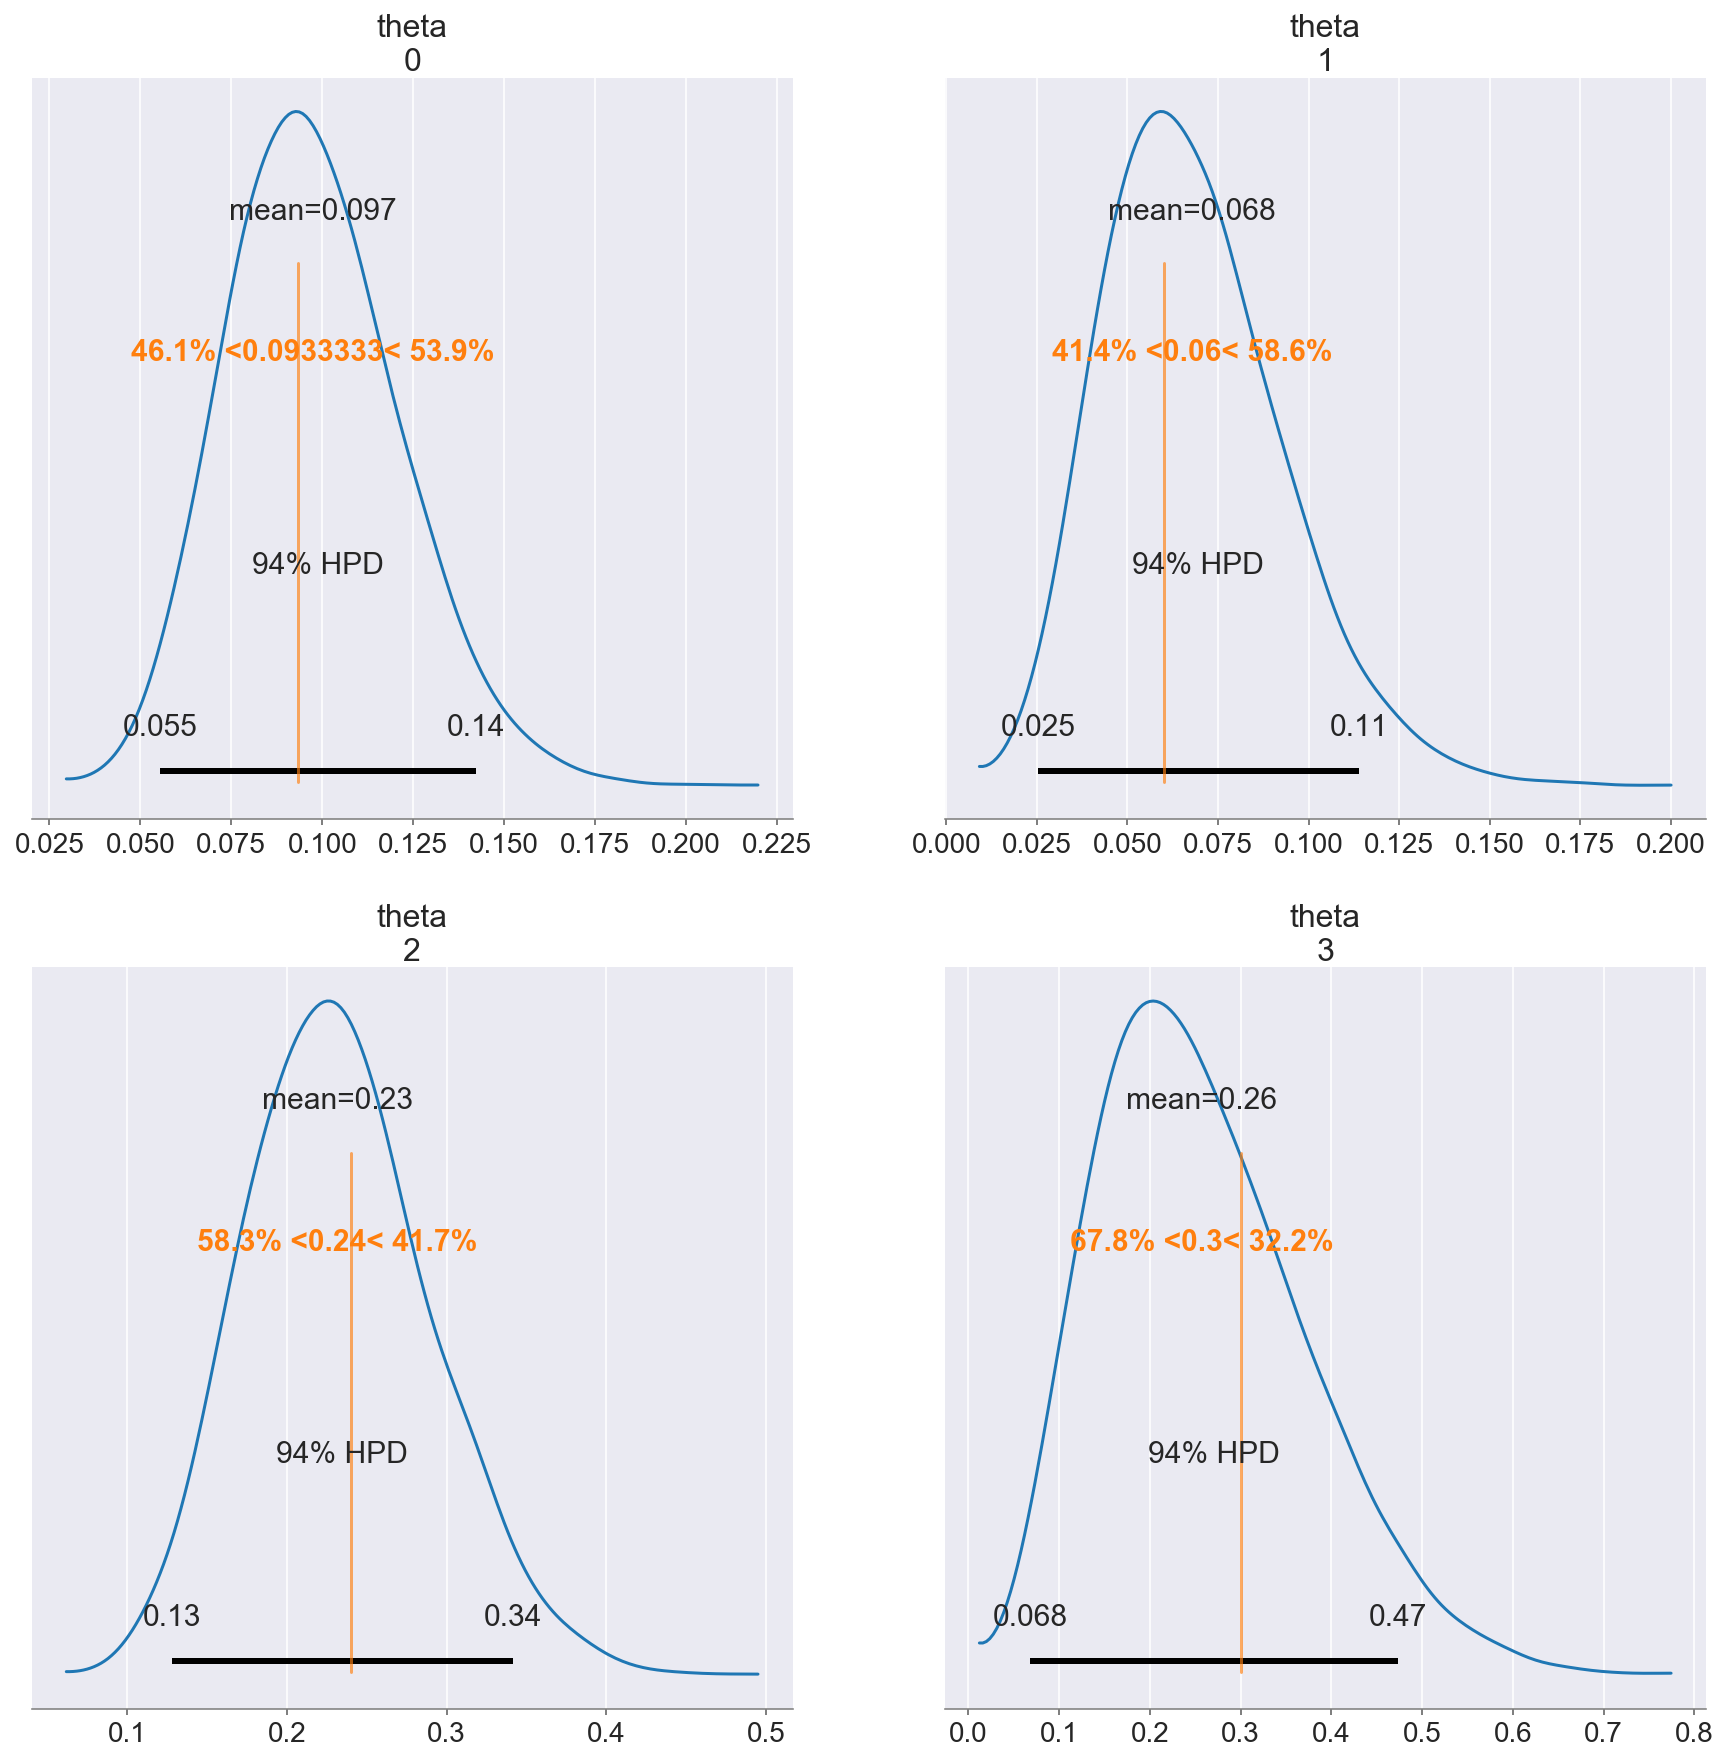

In [29]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(15,15,))
pm.plot_posterior(trace, var_names=["theta"], ax=axs, ref_val=list(observed_p))